## Lecture 4 – Machine Learning, Fall 2020
Adapted from Berkeley DS 100 Course in summer 2020 by Suraj Rampure


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

births = pd.read_csv('baby.csv')



In [3]:

births.head()



,Unnamed: 0,Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
0,1,120,284,27,62,100,False
1,2,113,282,33,64,135,False
2,3,128,279,28,64,115,True
3,4,108,282,23,67,125,True
4,5,136,286,25,62,93,False


In [4]:

births.shape



(1174, 7)


<h2 id="Bar-Plots">Bar Plots<a class="anchor-link" href="http://www.ds100.org/su20/resources/assets/lectures/lec09/lec09.html#Bar-Plots">¶</a></h2>



<p>We often use bar plots to display distributions of a categorical variable:</p>


In [5]:

births['Maternal Smoker'].value_counts()



False    715
True     459
Name: Maternal Smoker, dtype: int64

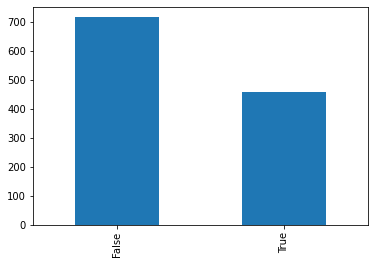

In [6]:

births['Maternal Smoker'].value_counts().plot(kind = 'bar');


<p>Note: putting a semicolon after a plot call hides all of the unnecessary text that comes after it (the <code>&lt;matplotlib.axes_....&gt;</code>).</p>


/home/rmool/.local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


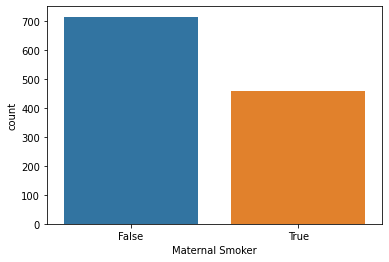

In [7]:

sns.countplot(births['Maternal Smoker']);




<p>But we can also use them to display a numerical variable that has been measured on individuals in different categories.</p>


In [8]:

# These are made up!
majors = ['Data Science', 'History', 'Biology', 'Business']
gpas = [3.35, 3.20, 2.98, 3.51]



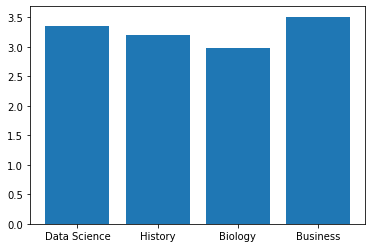

In [9]:

# What if we change bar to barh?
plt.bar(majors, gpas);



/home/rmool/.local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


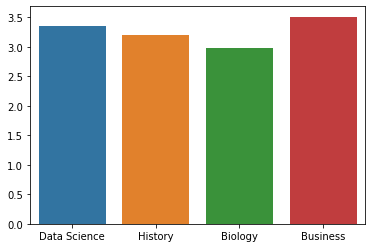

In [10]:

sns.barplot(majors, gpas);




<h2 id="Rug-plots">Rug plots<a class="anchor-link" href="http://www.ds100.org/su20/resources/assets/lectures/lec09/lec09.html#Rug-plots">¶</a></h2><p>Used for visualizing a single quantitative variable. Rug plots show us each and every value.</p>


In [11]:

bweights = births["Birth Weight"]



In [12]:

bweights



0       120
1       113
2       128
3       108
4       136
       ... 
1169    113
1170    128
1171    130
1172    125
1173    117
Name: Birth Weight, Length: 1174, dtype: int64

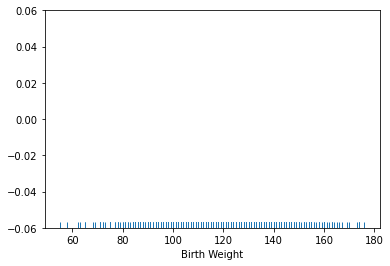

In [13]:

sns.rugplot(bweights);




<h2 id="Histograms">Histograms<a class="anchor-link" href="http://www.ds100.org/su20/resources/assets/lectures/lec09/lec09.html#Histograms">¶</a></h2><p>Our old friend!</p>


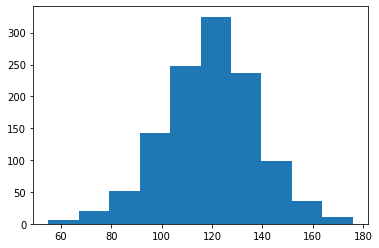

In [14]:

# By default, you get some arbitrary bins. We usually like to pick our own.
plt.hist(bweights);



In [15]:

min(bweights), max(bweights)



(55, 176)

In [16]:

bw_bins = range(50, 200, 5)



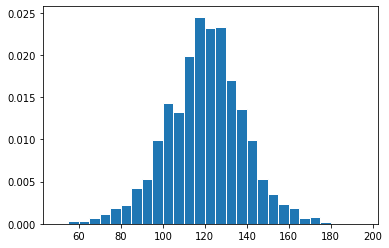

In [17]:

plt.hist(bweights, density=True, bins=bw_bins, ec='w');



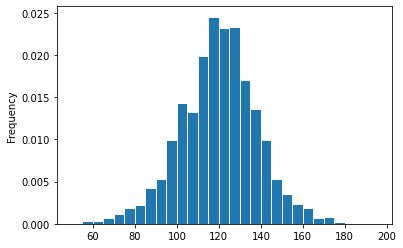

In [18]:

# alternative way of getting this plot
bweights.plot(kind = 'hist', density=True, bins=bw_bins, ec='w');




<p>Increasing bin width loses granularity, but this may be fine for our purposes.</p>


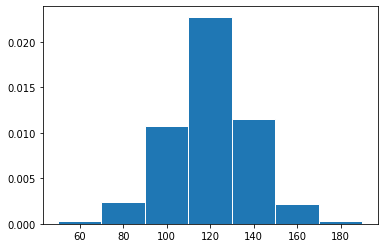

In [19]:

plt.hist(bweights, bins = np.arange(50, 200, 20), density=True, ec='w');




<p>The bin widths don't all need to be the same!</p>


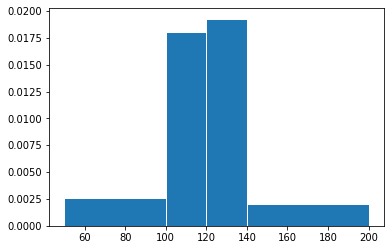

In [20]:

plt.hist(bweights, bins = [50, 100, 120, 140, 200], density=True, ec='w');




<h2 id="Density-Curves">Density Curves<a class="anchor-link" href="http://www.ds100.org/su20/resources/assets/lectures/lec09/lec09.html#Density-Curves">¶</a></h2>


/home/rmool/.local/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


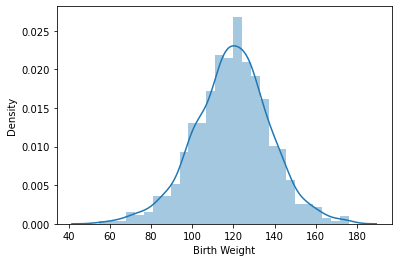

In [21]:

sns.distplot(bweights);




<p>Can isolate the histogram:</p>


/home/rmool/.local/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


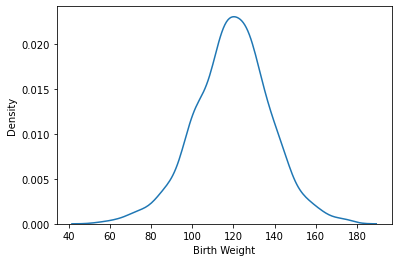

In [22]:

sns.distplot(bweights, hist=False);




<p>Can even show a rugplot with it!</p>


/home/rmool/.local/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/rmool/.local/lib/python3.7/site-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


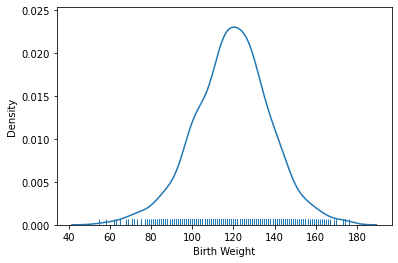

In [23]:

sns.distplot(bweights, hist=False, rug=True);



If a distribution has a long right tail, we call it skewed right.

- In such cases, the mean is typically to the right of the median. Think of the mean as the “balancing point” of the density.
- In the event that the tail is on the left, we say the data is skewed left.
- Our distribution can be symmetric, when both tails are of equal size.

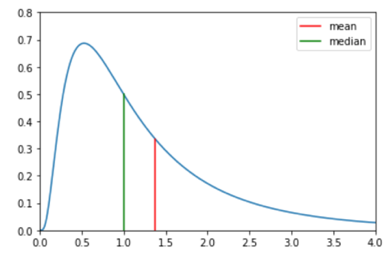


<h2 id="Box-Plots">Box Plots<a class="anchor-link" href="http://www.ds100.org/su20/resources/assets/lectures/lec09/lec09.html#Box-Plots">¶</a></h2>


/home/rmool/.local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/rmool/.local/lib/python3.7/site-packages/seaborn/_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


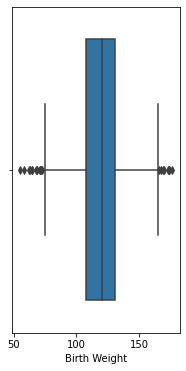

In [24]:

plt.figure(figsize = (3, 6))
sns.boxplot(bweights, orient='v'); # the orient argument makes this vertical, to be consistent with the side by side ones



In [25]:

q1 = np.percentile(bweights, 25)
q2 = np.percentile(bweights, 50)
q3 = np.percentile(bweights, 75)
iqr = q3 - q1
whisk1 = q1 - 1.5*iqr
whisk2 = q3 + 1.5*iqr

whisk1, q1, q2, q3, whisk2



(73.5, 108.0, 120.0, 131.0, 165.5)


<h2 id="Violin-Plots">Violin Plots<a class="anchor-link" href="http://www.ds100.org/su20/resources/assets/lectures/lec09/lec09.html#Violin-Plots">¶</a></h2>


/home/rmool/.local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/rmool/.local/lib/python3.7/site-packages/seaborn/_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


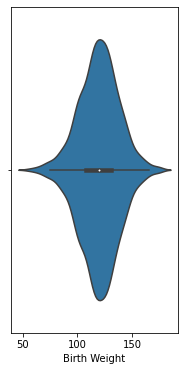

In [26]:

plt.figure(figsize = (3, 6))
sns.violinplot(bweights, orient='v');




<h2 id="Overlaid-Histograms-and-Density-Curves">Overlaid Histograms and Density Curves<a class="anchor-link" href="http://www.ds100.org/su20/resources/assets/lectures/lec09/lec09.html#Overlaid-Histograms-and-Density-Curves">¶</a></h2>


In [27]:

sm_bweights = births[births['Maternal Smoker'] == True]['Birth Weight']
nsm_bweights = births[births['Maternal Smoker'] == False]['Birth Weight']



/home/rmool/.local/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/rmool/.local/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


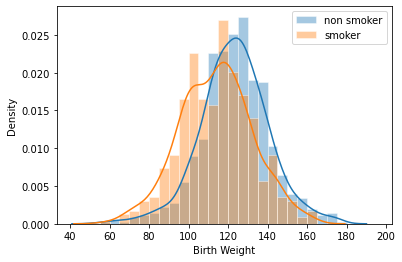

In [28]:

sns.distplot(nsm_bweights, bins=bw_bins, hist_kws=dict(ec='w'), label='non smoker');
sns.distplot(sm_bweights, bins=bw_bins, hist_kws=dict(ec='w'), label='smoker');
plt.legend();



/home/rmool/.local/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/rmool/.local/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


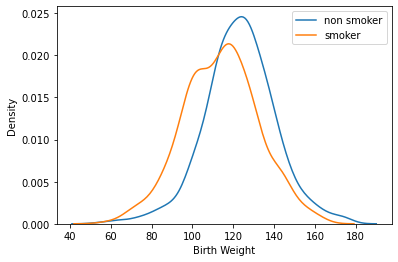

In [29]:

sns.distplot(nsm_bweights, bins=bw_bins, hist=False, hist_kws=dict(ec='w'), label='non smoker');
sns.distplot(sm_bweights, bins=bw_bins, hist=False, hist_kws=dict(ec='w'), label='smoker');
plt.legend();



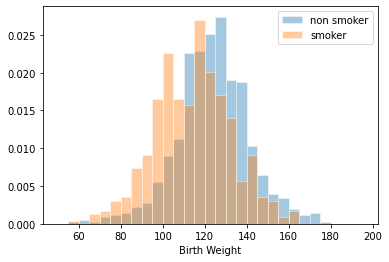

In [30]:

# Alpha adjusts transparency of the bins
plt.hist(nsm_bweights, bins = bw_bins, ec='w', density=True, alpha=0.4, label='non smoker');
plt.hist(sm_bweights, bins = bw_bins, ec='w', density=True, alpha=0.4, label='smoker');
plt.xlabel('Birth Weight')
plt.legend();




<h2 id="Side-by-side-box-plots-and-violin-plots">Side by side box plots and violin plots<a class="anchor-link" href="http://www.ds100.org/su20/resources/assets/lectures/lec09/lec09.html#Side-by-side-box-plots-and-violin-plots">¶</a></h2>


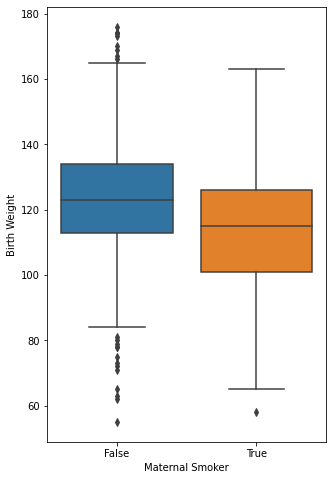

In [31]:

plt.figure(figsize=(5, 8))
sns.boxplot(data=births, x = 'Maternal Smoker', y = 'Birth Weight');



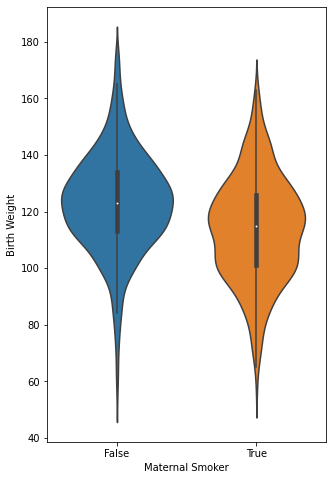

In [32]:

plt.figure(figsize=(5, 8))
sns.violinplot(data=births, x = 'Maternal Smoker', y = 'Birth Weight');




<p>A less fancy version of the above two plots:</p>


In [33]:

two_distributions = [nsm_bweights.values, sm_bweights.values]
groups = ['non-smokers', 'smokers']



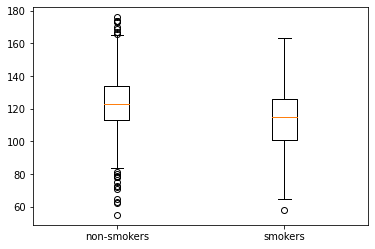

In [34]:

plt.boxplot(two_distributions, labels=groups);



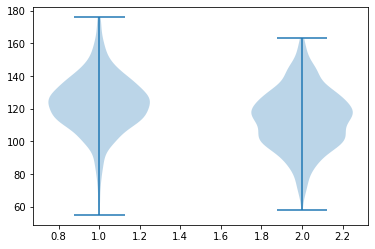

In [35]:

plt.violinplot(two_distributions);




<h2 id="Scatter-plots">Scatter plots<a class="anchor-link" href="http://www.ds100.org/su20/resources/assets/lectures/lec09/lec09.html#Scatter-plots">¶</a></h2>


In [36]:

births


,Unnamed: 0,Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
0,1,120,284,27,62,100,False
1,2,113,282,33,64,135,False
2,3,128,279,28,64,115,True
3,4,108,282,23,67,125,True
4,5,136,286,25,62,93,False
...,...,...,...,...,...,...,...
1169,1170,113,275,27,60,100,False
1170,1171,128,265,24,67,120,False
1171,1172,130,291,30,65,150,True
1172,1173,125,281,21,65,110,False


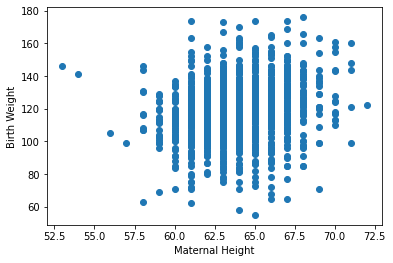

In [37]:

plt.scatter(births['Maternal Height'], births['Birth Weight'])
plt.xlabel('Maternal Height')
plt.ylabel('Birth Weight');



In [38]:

births['Birth Weight']



0       120
1       113
2       128
3       108
4       136
       ... 
1169    113
1170    128
1171    130
1172    125
1173    117
Name: Birth Weight, Length: 1174, dtype: int64

In [39]:

births['Maternal Height']



0       62
1       64
2       64
3       67
4       62
        ..
1169    60
1170    67
1171    65
1172    65
1173    65
Name: Maternal Height, Length: 1174, dtype: int64

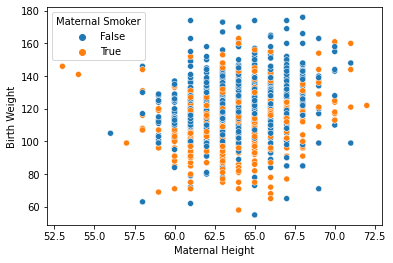

In [40]:

sns.scatterplot(data = births, x = 'Maternal Height', y = 'Birth Weight', hue = 'Maternal Smoker');



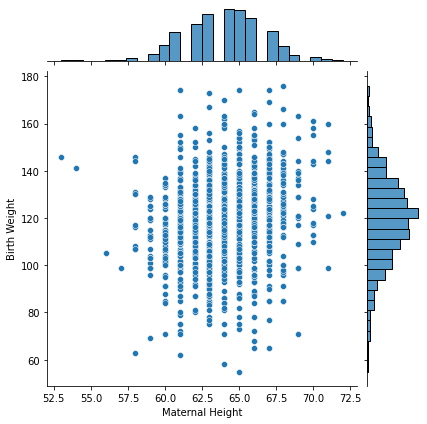

In [41]:

sns.jointplot(data = births, x = 'Maternal Height', y = 'Birth Weight');




<h2 id="Hex-plots-and-contour-plots">Hex plots and contour plots<a class="anchor-link" href="http://www.ds100.org/su20/resources/assets/lectures/lec09/lec09.html#Hex-plots-and-contour-plots">¶</a></h2>


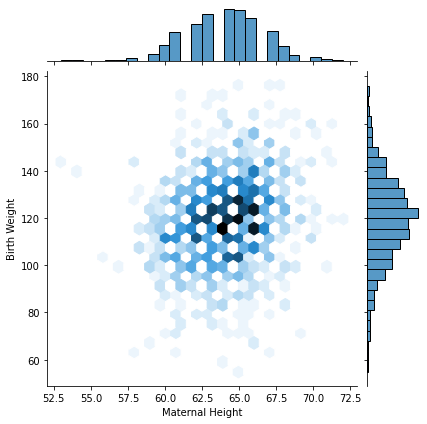

In [42]:

sns.jointplot(data = births, x = 'Maternal Height', y = 'Birth Weight', kind='hex');



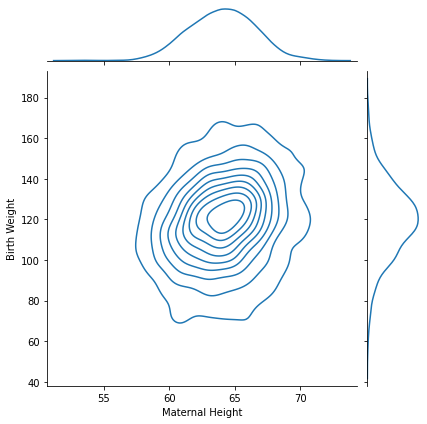

In [43]:

sns.jointplot(data = births, x = 'Maternal Height', y = 'Birth Weight', kind='kde');




<h2 id="Bonus">Bonus<a class="anchor-link" href="http://www.ds100.org/su20/resources/assets/lectures/lec09/lec09.html#Bonus">¶</a></h2><p>Calling <code>.plot()</code> results in weird things!</p>


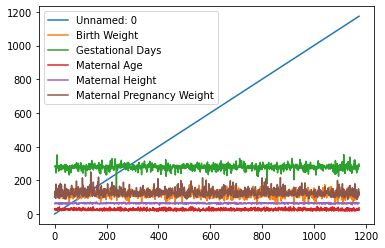

In [44]:

births.plot();




<h1 id="Overplotting">Overplotting<a class="anchor-link" href="http://www.ds100.org/su20/resources/assets/lectures/lec10/lec10.html#Overplotting">¶</a></h1>


In [45]:
df = births

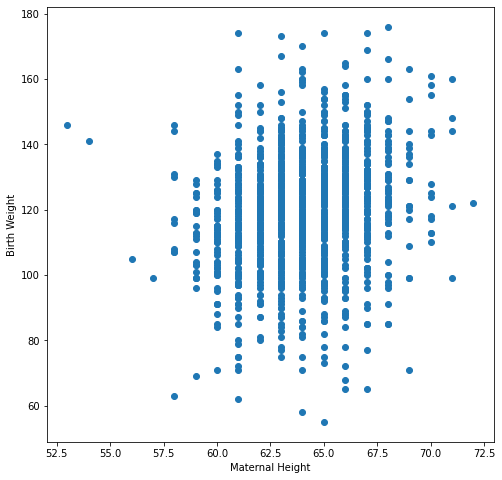

In [46]:

plt.figure(figsize=(8, 8))
plt.scatter(df['Maternal Height'], df['Birth Weight']);
plt.xlabel('Maternal Height')
plt.ylabel('Birth Weight');



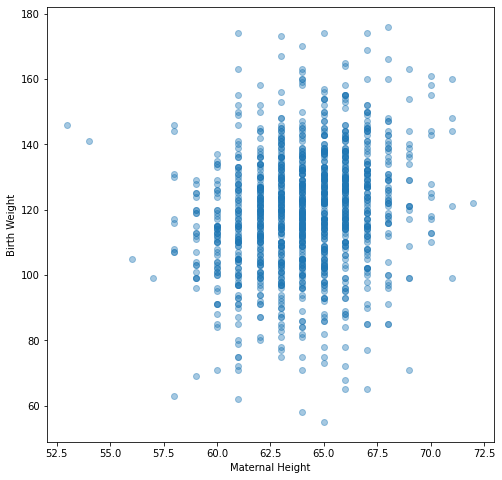

In [47]:

plt.figure(figsize=(8, 8))
plt.scatter(df['Maternal Height'], df['Birth Weight'], alpha = 0.4);
plt.xlabel('Maternal Height')
plt.ylabel('Birth Weight');



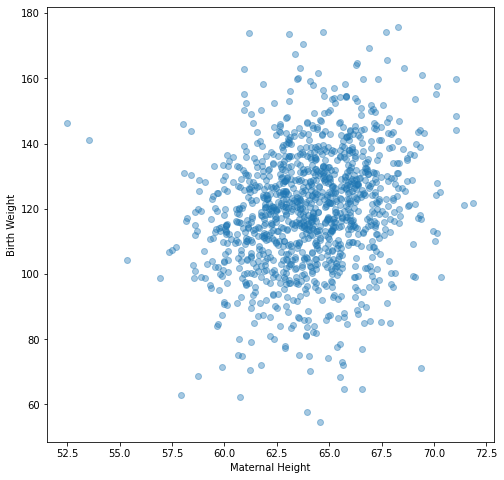

In [48]:

plt.figure(figsize=(8, 8))
r1 = np.random.randn(len(df))/3
r2 = np.random.randn(len(df))/3
plt.scatter(df['Maternal Height'] + r1, df['Birth Weight'] + r2, alpha = 0.4);
plt.xlabel('Maternal Height')
plt.ylabel('Birth Weight');




<h1 id="Kernel-Density-Estimates">Kernel Density Estimates<a class="anchor-link" href="http://www.ds100.org/su20/resources/assets/lectures/lec10/lec10.html#Kernel-Density-Estimates">¶</a></h1>


In [49]:

points = [2.2, 2.8, 3.7, 5.3, 5.7]



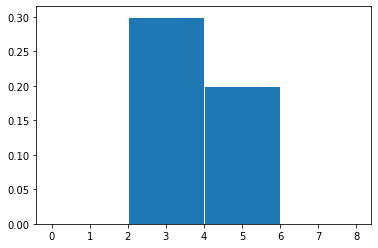

In [50]:

plt.hist(points, bins=range(0, 10, 2), ec='w', density=True);




<p>Let's define some <strong>kernels</strong>. We will explain these formulas momentarily. We'll also define some helper functions for visualization purposes.</p>


In [51]:

def gaussian(x, z, a):
    # Gaussian kernel
    return (1/np.sqrt(2*np.pi*a**2)) * np.e ** (-(x - z)**2 / (2 * a**2))

def boxcar(x, z, a):
    # Boxcar kernel
    if np.abs(x - z) <= a/2:
        return 1/a
    return 0



In [52]:

def create_kde(kernel, pts, a):
    # Takes in a kernel, set of points, and alpha
    # Returns the KDE as a function
    def f(x):
        output = 0
        for pt in pts:
            output += kernel(x, pt, a)
        return output / len(pts) # Normalization factor
    return f

def plot_kde(kernel, pts, a):
    # Calls create_kde and plots the corresponding KDE
    f = create_kde(kernel, pts, a)
    x = np.linspace(min(pts) - 5, max(pts) + 5, 1000)
    y = [f(xi) for xi in x]
    plt.plot(x, y);
    
def plot_separate_kernels(kernel, pts, a, norm=False):
    # Plots individual kernels, which are then summed to create the KDE
    x = np.linspace(min(pts) - 5, max(pts) + 5, 1000)
    for pt in pts:
        if norm:
            y = [(1/len(pts)) * kernel(xi, pt, a) for xi in x]
        else:
            y = [kernel(xi, pt, a) for xi in x]
        plt.plot(x, y)
    
    plt.show();




<p>Here are our five points.</p>


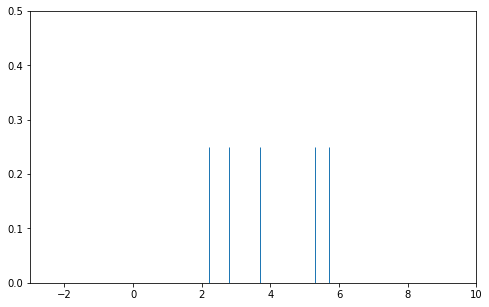

In [53]:

plt.figure(figsize=(8, 5))
plt.xlim(-3, 10)
plt.ylim(0, 0.5)
sns.rugplot(points, height = 0.5);




<h3 id="Step-1:-Place-a-kernel-at-each-point">Step 1: Place a kernel at each point<a class="anchor-link" href="http://www.ds100.org/su20/resources/assets/lectures/lec10/lec10.html#Step-1:-Place-a-kernel-at-each-point">¶</a></h3><p>We'll start with the Gaussian kernel.</p>


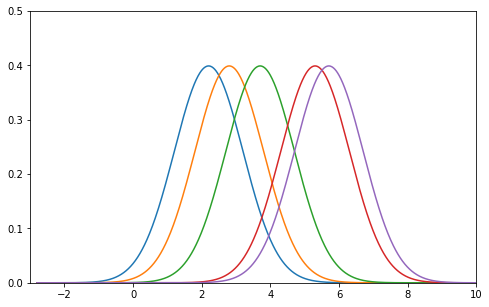

In [54]:

plt.figure(figsize=(8, 5))
plt.xlim(-3, 10)
plt.ylim(0, 0.5)
plot_separate_kernels(gaussian, points, a = 1);


<h3 id="Step-2:-Normalize-kernels-so-that-total-area-is-1">Step 2: Normalize kernels so that total area is 1<a class="anchor-link" href="http://www.ds100.org/su20/resources/assets/lectures/lec10/lec10.html#Step-2:-Normalize-kernels-so-that-total-area-is-1">¶</a></h3>


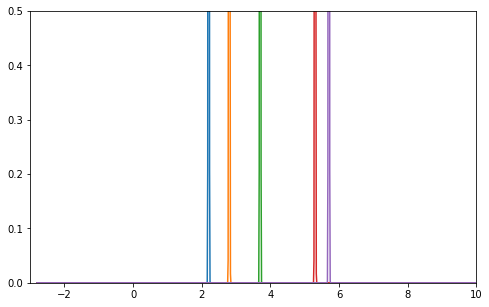

In [55]:

plt.figure(figsize=(8, 5))
plt.xlim(-3, 10)
plt.ylim(0, 0.5)
plot_separate_kernels(gaussian, points, a = 0.01, norm = True);




<h3 id="Step-3:-Sum-all-kernels-together">Step 3: Sum all kernels together<a class="anchor-link" href="http://www.ds100.org/su20/resources/assets/lectures/lec10/lec10.html#Step-3:-Sum-all-kernels-together">¶</a></h3>


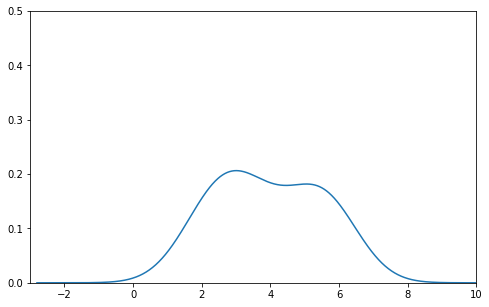

In [56]:

plt.figure(figsize=(8, 5))
plt.xlim(-3, 10)
plt.ylim(0, 0.5)
plot_kde(gaussian, points, a = 1)




<p>This looks identical to the smooth curve that <code>sns.distplot</code> gives us (when we set the appropriate parameter):</p>


In [ ]:

plt.figure(figsize=(8, 5))
plt.xlim(-3, 10)
plt.ylim(0, 0.5)
sns.distplot(points, kde_kws={'bw': 1});



## Kernels

**Gaussian**

<center>$K_a(x,x_i)= \frac{1}{\sqrt{2\pi\alpha^2}}e^{-\frac{(x-x_i)^2}{2\alpha^2}}$<center/>
    
**Boxcar**

<center>$K_a(x,x_i)= \begin{cases}\frac{1}{\alpha}, & |x-x_i|\leq \frac{\alpha}{2}\\ 0, & else\end{cases}$<center/>

In [ ]:

plt.figure(figsize=(8, 5))
plt.xlim(-3, 10)
plt.ylim(0, 0.5)
plt.title(r'KDE of toy data with Gaussian kernel and $\alpha$ = 1')
plot_kde(gaussian, points, a = 1)



In [ ]:

plt.figure(figsize=(8, 5))
plt.xlim(-3, 10)
plt.ylim(0, 0.5)
plt.title(r'KDE of toy data with Boxcar kernel and $\alpha$ = 1')
plot_kde(boxcar, points, a = 1)




<h2 id="Effect-of-bandwidth-hyperparameter-$\alpha$">Effect of bandwidth hyperparameter <span class="MathJax_Preview" style="color: inherit;"></span><span class="MathJax" data-mathml='&lt;math xmlns="http://www.w3.org/1998/Math/MathML"&gt;&lt;mi&gt;&amp;#x03B1;&lt;/mi&gt;&lt;/math&gt;' id="MathJax-Element-3-Frame" role="presentation" style="position: relative;" tabindex="0"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-97" style="width: 0.646em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.532em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.934em, 1000.53em, 2.616em, -999.998em); top: -2.498em; left: 0em;"><span class="mrow" id="MathJax-Span-98"><span class="mi" id="MathJax-Span-99" style="font-family: STIXGeneral-Italic;">𝛼<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.002em;"></span></span></span><span style="display: inline-block; width: 0px; height: 2.502em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.043em; border-left: 0px solid; width: 0px; height: 0.639em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>α</mi></math></span></span><script id="MathJax-Element-3" type="math/tex">\alpha</script><a class="anchor-link" href="http://www.ds100.org/su20/resources/assets/lectures/lec10/lec10.html#Effect-of-bandwidth-hyperparameter-$\alpha$">¶</a></h2><p>Let's bring in some (different) toy data.</p>


In [ ]:

tips = sns.load_dataset('tips')



In [ ]:

tips.head()



In [ ]:

vals = tips['total_bill']



In [ ]:

plt.figure(figsize=(8, 5))
plt.ylim(0, 0.15)
plt.title(r'KDE of tips with Gaussian kernel and $\alpha$ = 0.1')
plot_kde(gaussian, vals, a = 0.1)



In [ ]:

plt.figure(figsize=(8, 5))
plt.ylim(0, 0.1)
plt.title(r'KDE of tips with Gaussian kernel and $\alpha$ = 1')
plot_kde(gaussian, vals, a = 1)



In [ ]:

plt.figure(figsize=(8, 5))
plt.ylim(0, 0.1)
plt.title(r'KDE of tips with Gaussian kernel and $\alpha$ = 2')
plot_kde(gaussian, vals, a = 2)



In [ ]:

plt.figure(figsize=(8, 5))
plt.ylim(0, 0.1)
plt.title(r'KDE of tips with Gaussian kernel and $\alpha$ = 10')
plot_kde(gaussian, vals, a = 5)




<h3 id="KDE-Formula">KDE Formula<a class="anchor-link" href="http://www.ds100.org/su20/resources/assets/lectures/lec10/lec10.html#KDE-Formula">¶</a></h3><span class="MathJax_Preview" style="color: inherit;"></span><div class="MathJax_Display" style="text-align: center;"><span class="MathJax" data-mathml='&lt;math xmlns="http://www.w3.org/1998/Math/MathML" display="block"&gt;&lt;msub&gt;&lt;mi&gt;f&lt;/mi&gt;&lt;mrow class="MJX-TeXAtom-ORD"&gt;&lt;mi&gt;&amp;#x03B1;&lt;/mi&gt;&lt;/mrow&gt;&lt;/msub&gt;&lt;mo stretchy="false"&gt;(&lt;/mo&gt;&lt;mi&gt;x&lt;/mi&gt;&lt;mo stretchy="false"&gt;)&lt;/mo&gt;&lt;mo&gt;=&lt;/mo&gt;&lt;munderover&gt;&lt;mo&gt;&amp;#x2211;&lt;/mo&gt;&lt;mrow class="MJX-TeXAtom-ORD"&gt;&lt;mi&gt;i&lt;/mi&gt;&lt;mo&gt;=&lt;/mo&gt;&lt;mn&gt;1&lt;/mn&gt;&lt;/mrow&gt;&lt;mi&gt;n&lt;/mi&gt;&lt;/munderover&gt;&lt;mfrac&gt;&lt;mn&gt;1&lt;/mn&gt;&lt;mi&gt;n&lt;/mi&gt;&lt;/mfrac&gt;&lt;mo&gt;&amp;#x22C5;&lt;/mo&gt;&lt;msub&gt;&lt;mi&gt;K&lt;/mi&gt;&lt;mrow class="MJX-TeXAtom-ORD"&gt;&lt;mi&gt;&amp;#x03B1;&lt;/mi&gt;&lt;/mrow&gt;&lt;/msub&gt;&lt;mo stretchy="false"&gt;(&lt;/mo&gt;&lt;mi&gt;x&lt;/mi&gt;&lt;mo&gt;,&lt;/mo&gt;&lt;msub&gt;&lt;mi&gt;x&lt;/mi&gt;&lt;mi&gt;i&lt;/mi&gt;&lt;/msub&gt;&lt;mo stretchy="false"&gt;)&lt;/mo&gt;&lt;mo&gt;=&lt;/mo&gt;&lt;mfrac&gt;&lt;mn&gt;1&lt;/mn&gt;&lt;mi&gt;n&lt;/mi&gt;&lt;/mfrac&gt;&lt;munderover&gt;&lt;mo&gt;&amp;#x2211;&lt;/mo&gt;&lt;mrow class="MJX-TeXAtom-ORD"&gt;&lt;mi&gt;i&lt;/mi&gt;&lt;mo&gt;=&lt;/mo&gt;&lt;mn&gt;1&lt;/mn&gt;&lt;/mrow&gt;&lt;mi&gt;n&lt;/mi&gt;&lt;/munderover&gt;&lt;msub&gt;&lt;mi&gt;K&lt;/mi&gt;&lt;mrow class="MJX-TeXAtom-ORD"&gt;&lt;mi&gt;&amp;#x03B1;&lt;/mi&gt;&lt;/mrow&gt;&lt;/msub&gt;&lt;mo stretchy="false"&gt;(&lt;/mo&gt;&lt;mi&gt;x&lt;/mi&gt;&lt;mo&gt;,&lt;/mo&gt;&lt;msub&gt;&lt;mi&gt;x&lt;/mi&gt;&lt;mi&gt;i&lt;/mi&gt;&lt;/msub&gt;&lt;mo stretchy="false"&gt;)&lt;/mo&gt;&lt;/math&gt;' id="MathJax-Element-4-Frame" role="presentation" style="text-align: center; position: relative;" tabindex="0"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-100" style="width: 21.372em; display: inline-block;"><span style="display: inline-block; position: relative; width: 17.801em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(0.777em, 1017.74em, 3.991em, -999.997em); top: -2.557em; left: 0em;"><span class="mrow" id="MathJax-Span-101"><span class="msubsup" id="MathJax-Span-102"><span style="display: inline-block; position: relative; width: 1.015em; height: 0px;"><span style="position: absolute; clip: rect(3.158em, 1000.6em, 4.348em, -999.997em); top: -3.985em; left: 0em;"><span class="mi" id="MathJax-Span-103" style="font-family: STIXGeneral-Italic;">𝑓<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.063em;"></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -3.807em; left: 0.539em;"><span class="texatom" id="MathJax-Span-104"><span class="mrow" id="MathJax-Span-105"><span class="mi" id="MathJax-Span-106" style="font-size: 70.7%; font-family: STIXGeneral-Italic;">𝛼<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.003em;"></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span><span class="mo" id="MathJax-Span-107" style="font-family: STIXGeneral-Regular;">(</span><span class="mi" id="MathJax-Span-108" style="font-family: STIXGeneral-Italic;">𝑥</span><span class="mo" id="MathJax-Span-109" style="font-family: STIXGeneral-Regular;">)</span><span class="mo" id="MathJax-Span-110" style="font-family: STIXGeneral-Regular; padding-left: 0.301em;">=</span><span class="munderover" id="MathJax-Span-111" style="padding-left: 0.301em;"><span style="display: inline-block; position: relative; width: 1.313em; height: 0px;"><span style="position: absolute; clip: rect(2.86em, 1001.19em, 4.646em, -999.997em); top: -3.985em; left: 0em;"><span class="mo" id="MathJax-Span-112" style="font-family: STIXSizeOneSym; vertical-align: -0.533em;">∑</span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; clip: rect(3.336em, 1001.01em, 4.289em, -999.997em); top: -2.854em; left: 0.122em;"><span class="texatom" id="MathJax-Span-113"><span class="mrow" id="MathJax-Span-114"><span class="mi" id="MathJax-Span-115" style="font-size: 70.7%; font-family: STIXGeneral-Italic;">𝑖</span><span class="mo" id="MathJax-Span-116" style="font-size: 70.7%; font-family: STIXGeneral-Regular;">=</span><span class="mn" id="MathJax-Span-117" style="font-size: 70.7%; font-family: STIXGeneral-Regular;">1</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; clip: rect(3.396em, 1000.36em, 4.17em, -999.997em); top: -5.176em; left: 0.479em;"><span class="mi" id="MathJax-Span-118" style="font-size: 70.7%; font-family: STIXGeneral-Italic;">𝑛</span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span><span class="mfrac" id="MathJax-Span-119" style="padding-left: 0.182em;"><span style="display: inline-block; position: relative; width: 0.598em; height: 0px; margin-right: 0.122em; margin-left: 0.122em;"><span style="position: absolute; clip: rect(3.158em, 1000.42em, 4.17em, -999.997em); top: -4.64em; left: 50%; margin-left: -0.235em;"><span class="mn" id="MathJax-Span-120" style="font-family: STIXGeneral-Regular;">1</span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; clip: rect(3.396em, 1000.48em, 4.17em, -999.997em); top: -3.271em; left: 50%; margin-left: -0.235em;"><span class="mi" id="MathJax-Span-121" style="font-family: STIXGeneral-Italic;">𝑛</span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; clip: rect(0.836em, 1000.6em, 1.253em, -999.997em); top: -1.307em; left: 0em;"><span style="display: inline-block; overflow: hidden; vertical-align: 0em; border-top: 1.3px solid; width: 0.598em; height: 0px;"></span><span style="display: inline-block; width: 0px; height: 1.074em;"></span></span></span></span><span class="mo" id="MathJax-Span-122" style="font-family: STIXGeneral-Regular; padding-left: 0.241em;">⋅</span><span class="msubsup" id="MathJax-Span-123" style="padding-left: 0.241em;"><span style="display: inline-block; position: relative; width: 1.193em; height: 0px;"><span style="position: absolute; clip: rect(3.158em, 1000.78em, 4.17em, -999.997em); top: -3.985em; left: 0em;"><span class="mi" id="MathJax-Span-124" style="font-family: STIXGeneral-Italic;">𝐾<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.063em;"></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -3.807em; left: 0.777em;"><span class="texatom" id="MathJax-Span-125"><span class="mrow" id="MathJax-Span-126"><span class="mi" id="MathJax-Span-127" style="font-size: 70.7%; font-family: STIXGeneral-Italic;">𝛼<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.003em;"></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span><span class="mo" id="MathJax-Span-128" style="font-family: STIXGeneral-Regular;">(</span><span class="mi" id="MathJax-Span-129" style="font-family: STIXGeneral-Italic;">𝑥</span><span class="mo" id="MathJax-Span-130" style="font-family: STIXGeneral-Regular;">,</span><span class="msubsup" id="MathJax-Span-131" style="padding-left: 0.182em;"><span style="display: inline-block; position: relative; width: 0.836em; height: 0px;"><span style="position: absolute; clip: rect(3.396em, 1000.54em, 4.17em, -999.997em); top: -3.985em; left: 0em;"><span class="mi" id="MathJax-Span-132" style="font-family: STIXGeneral-Italic;">𝑥</span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -3.807em; left: 0.539em;"><span class="mi" id="MathJax-Span-133" style="font-size: 70.7%; font-family: STIXGeneral-Italic;">𝑖</span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span><span class="mo" id="MathJax-Span-134" style="font-family: STIXGeneral-Regular;">)</span><span class="mo" id="MathJax-Span-135" style="font-family: STIXGeneral-Regular; padding-left: 0.301em;">=</span><span class="mfrac" id="MathJax-Span-136" style="padding-left: 0.301em;"><span style="display: inline-block; position: relative; width: 0.598em; height: 0px; margin-right: 0.122em; margin-left: 0.122em;"><span style="position: absolute; clip: rect(3.158em, 1000.42em, 4.17em, -999.997em); top: -4.64em; left: 50%; margin-left: -0.235em;"><span class="mn" id="MathJax-Span-137" style="font-family: STIXGeneral-Regular;">1</span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; clip: rect(3.396em, 1000.48em, 4.17em, -999.997em); top: -3.271em; left: 50%; margin-left: -0.235em;"><span class="mi" id="MathJax-Span-138" style="font-family: STIXGeneral-Italic;">𝑛</span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; clip: rect(0.836em, 1000.6em, 1.253em, -999.997em); top: -1.307em; left: 0em;"><span style="display: inline-block; overflow: hidden; vertical-align: 0em; border-top: 1.3px solid; width: 0.598em; height: 0px;"></span><span style="display: inline-block; width: 0px; height: 1.074em;"></span></span></span></span><span class="munderover" id="MathJax-Span-139" style="padding-left: 0.182em;"><span style="display: inline-block; position: relative; width: 1.313em; height: 0px;"><span style="position: absolute; clip: rect(2.86em, 1001.19em, 4.646em, -999.997em); top: -3.985em; left: 0em;"><span class="mo" id="MathJax-Span-140" style="font-family: STIXSizeOneSym; vertical-align: -0.533em;">∑</span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; clip: rect(3.336em, 1001.01em, 4.289em, -999.997em); top: -2.854em; left: 0.122em;"><span class="texatom" id="MathJax-Span-141"><span class="mrow" id="MathJax-Span-142"><span class="mi" id="MathJax-Span-143" style="font-size: 70.7%; font-family: STIXGeneral-Italic;">𝑖</span><span class="mo" id="MathJax-Span-144" style="font-size: 70.7%; font-family: STIXGeneral-Regular;">=</span><span class="mn" id="MathJax-Span-145" style="font-size: 70.7%; font-family: STIXGeneral-Regular;">1</span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; clip: rect(3.396em, 1000.36em, 4.17em, -999.997em); top: -5.176em; left: 0.479em;"><span class="mi" id="MathJax-Span-146" style="font-size: 70.7%; font-family: STIXGeneral-Italic;">𝑛</span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span><span class="msubsup" id="MathJax-Span-147" style="padding-left: 0.182em;"><span style="display: inline-block; position: relative; width: 1.193em; height: 0px;"><span style="position: absolute; clip: rect(3.158em, 1000.78em, 4.17em, -999.997em); top: -3.985em; left: 0em;"><span class="mi" id="MathJax-Span-148" style="font-family: STIXGeneral-Italic;">𝐾<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.063em;"></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -3.807em; left: 0.777em;"><span class="texatom" id="MathJax-Span-149"><span class="mrow" id="MathJax-Span-150"><span class="mi" id="MathJax-Span-151" style="font-size: 70.7%; font-family: STIXGeneral-Italic;">𝛼<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.003em;"></span></span></span></span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span><span class="mo" id="MathJax-Span-152" style="font-family: STIXGeneral-Regular;">(</span><span class="mi" id="MathJax-Span-153" style="font-family: STIXGeneral-Italic;">𝑥</span><span class="mo" id="MathJax-Span-154" style="font-family: STIXGeneral-Regular;">,</span><span class="msubsup" id="MathJax-Span-155" style="padding-left: 0.182em;"><span style="display: inline-block; position: relative; width: 0.836em; height: 0px;"><span style="position: absolute; clip: rect(3.396em, 1000.54em, 4.17em, -999.997em); top: -3.985em; left: 0em;"><span class="mi" id="MathJax-Span-156" style="font-family: STIXGeneral-Italic;">𝑥</span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -3.807em; left: 0.539em;"><span class="mi" id="MathJax-Span-157" style="font-size: 70.7%; font-family: STIXGeneral-Italic;">𝑖</span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span><span class="mo" id="MathJax-Span-158" style="font-family: STIXGeneral-Regular;">)</span></span><span style="display: inline-block; width: 0px; height: 2.562em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -1.568em; border-left: 0px solid; width: 0px; height: 3.575em;"></span></span></nobr><span class="MJX_Assistive_MathML MJX_Assistive_MathML_Block" role="presentation"><math display="block" xmlns="http://www.w3.org/1998/Math/MathML"><msub><mi>f</mi><mrow class="MJX-TeXAtom-ORD"><mi>α</mi></mrow></msub><mo stretchy="false">(</mo><mi>x</mi><mo stretchy="false">)</mo><mo>=</mo><munderover><mo>∑</mo><mrow class="MJX-TeXAtom-ORD"><mi>i</mi><mo>=</mo><mn>1</mn></mrow><mi>n</mi></munderover><mfrac><mn>1</mn><mi>n</mi></mfrac><mo>⋅</mo><msub><mi>K</mi><mrow class="MJX-TeXAtom-ORD"><mi>α</mi></mrow></msub><mo stretchy="false">(</mo><mi>x</mi><mo>,</mo><msub><mi>x</mi><mi>i</mi></msub><mo stretchy="false">)</mo><mo>=</mo><mfrac><mn>1</mn><mi>n</mi></mfrac><munderover><mo>∑</mo><mrow class="MJX-TeXAtom-ORD"><mi>i</mi><mo>=</mo><mn>1</mn></mrow><mi>n</mi></munderover><msub><mi>K</mi><mrow class="MJX-TeXAtom-ORD"><mi>α</mi></mrow></msub><mo stretchy="false">(</mo><mi>x</mi><mo>,</mo><msub><mi>x</mi><mi>i</mi></msub><mo stretchy="false">)</mo></math></span></span></div><script id="MathJax-Element-4" type="math/tex; mode=display">f_{\alpha}(x) = \sum_{i = 1}^n \frac{1}{n} \cdot K_{\alpha}(x, x_i) =  \frac{1}{n} \sum_{i = 1}^n K_{\alpha}(x, x_i)</script>



<p>Let's generate data that follows <span class="MathJax_Preview" style="color: inherit;"></span><span class="MathJax" data-mathml='&lt;math xmlns="http://www.w3.org/1998/Math/MathML"&gt;&lt;mi&gt;y&lt;/mi&gt;&lt;mo&gt;=&lt;/mo&gt;&lt;mn&gt;2&lt;/mn&gt;&lt;msup&gt;&lt;mi&gt;x&lt;/mi&gt;&lt;mn&gt;3&lt;/mn&gt;&lt;/msup&gt;&lt;/math&gt;' id="MathJax-Element-5-Frame" role="presentation" style="position: relative;" tabindex="0"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-159" style="width: 3.872em; display: inline-block;"><span style="display: inline-block; position: relative; width: 3.217em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.551em, 1003.22em, 2.92em, -999.997em); top: -2.557em; left: 0em;"><span class="mrow" id="MathJax-Span-160"><span class="mi" id="MathJax-Span-161" style="font-family: STIXGeneral-Italic;">𝑦</span><span class="mo" id="MathJax-Span-162" style="font-family: STIXGeneral-Regular; padding-left: 0.301em;">=</span><span class="mn" id="MathJax-Span-163" style="font-family: STIXGeneral-Regular; padding-left: 0.301em;">2</span><span class="msubsup" id="MathJax-Span-164"><span style="display: inline-block; position: relative; width: 0.955em; height: 0px;"><span style="position: absolute; clip: rect(3.396em, 1000.54em, 4.17em, -999.997em); top: -3.985em; left: 0em;"><span class="mi" id="MathJax-Span-165" style="font-family: STIXGeneral-Italic;">𝑥</span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span><span style="position: absolute; top: -4.342em; left: 0.539em;"><span class="mn" id="MathJax-Span-166" style="font-size: 70.7%; font-family: STIXGeneral-Regular;">3</span><span style="display: inline-block; width: 0px; height: 3.991em;"></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 2.562em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.282em; border-left: 0px solid; width: 0px; height: 1.361em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>y</mi><mo>=</mo><mn>2</mn><msup><mi>x</mi><mn>3</mn></msup></math></span></span><script id="MathJax-Element-5" type="math/tex">y = 2x^3</script>.</p>


In [ ]:

x = np.array([t + np.random.random() for t in np.linspace(1, 10, 20)])
y = 2*x**3



In [ ]:

plt.scatter(x, y);



First, let's raise  𝑥  to a power:

In [ ]:

plt.scatter(x**2, y);



We used  $x^2$  as the transformation. It's better, but still not linear. Let's try  $x^3$ .

In [ ]:

plt.scatter(x**3, y);



That worked well, which makes sense: the original data was cubic in  $x$ . We can overdo it, too: let's try  $x^5$ .

In [ ]:

plt.scatter(x**5, y);




<p>Now, the data follows some sort of square root relationship. It's certainly not linear; this goes to show that not all power transformations work the same way, and you'll need some experimentation.</p>
<p>Let's instead try taking the log of y from the original data.</p>


In [ ]:

plt.scatter(x, np.log(y));



On it's own, this didn't quite work! Since  $𝑦=2x^3$ ,  $\log(y)=\log(2)+3\log(x)$.

That means we are essentially plotting ```plt.scatter(x, np.log(x))```, which is not linear.

In order for this to be linear, we need to take the log of  𝑥  as well:



In [ ]:

plt.scatter(np.log(x), np.log(y));




<p>The relationship being visualized now is</p>
<span class="MathJax_Preview" style="color: inherit;"></span><div class="MathJax_Display" style="text-align: center;"><span class="MathJax" data-mathml='&lt;math xmlns="http://www.w3.org/1998/Math/MathML" display="block"&gt;&lt;mi&gt;log&lt;/mi&gt;&lt;mo&gt;&amp;#x2061;&lt;/mo&gt;&lt;mo stretchy="false"&gt;(&lt;/mo&gt;&lt;mi&gt;y&lt;/mi&gt;&lt;mo stretchy="false"&gt;)&lt;/mo&gt;&lt;mo&gt;=&lt;/mo&gt;&lt;mi&gt;log&lt;/mi&gt;&lt;mo&gt;&amp;#x2061;&lt;/mo&gt;&lt;mo stretchy="false"&gt;(&lt;/mo&gt;&lt;mn&gt;2&lt;/mn&gt;&lt;mo stretchy="false"&gt;)&lt;/mo&gt;&lt;mo&gt;+&lt;/mo&gt;&lt;mn&gt;3&lt;/mn&gt;&lt;mi&gt;log&lt;/mi&gt;&lt;mo&gt;&amp;#x2061;&lt;/mo&gt;&lt;mo stretchy="false"&gt;(&lt;/mo&gt;&lt;mi&gt;x&lt;/mi&gt;&lt;mo stretchy="false"&gt;)&lt;/mo&gt;&lt;/math&gt;' id="MathJax-Element-16-Frame" role="presentation" style="text-align: center; position: relative;" tabindex="0"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-225" style="width: 12.682em; display: inline-block;"><span style="display: inline-block; position: relative; width: 10.539em; height: 0px; font-size: 120%;"><span style="position: absolute; clip: rect(1.729em, 1010.48em, 2.979em, -999.997em); top: -2.557em; left: 0em;"><span class="mrow" id="MathJax-Span-226"><span class="mi" id="MathJax-Span-227" style="font-family: STIXGeneral-Regular;">log</span><span class="mo" id="MathJax-Span-228"></span><span class="mo" id="MathJax-Span-229" style="font-family: STIXGeneral-Regular;">(</span><span class="mi" id="MathJax-Span-230" style="font-family: STIXGeneral-Italic;">𝑦</span><span class="mo" id="MathJax-Span-231" style="font-family: STIXGeneral-Regular;">)</span><span class="mo" id="MathJax-Span-232" style="font-family: STIXGeneral-Regular; padding-left: 0.301em;">=</span><span class="mi" id="MathJax-Span-233" style="font-family: STIXGeneral-Regular; padding-left: 0.301em;">log</span><span class="mo" id="MathJax-Span-234"></span><span class="mo" id="MathJax-Span-235" style="font-family: STIXGeneral-Regular;">(</span><span class="mn" id="MathJax-Span-236" style="font-family: STIXGeneral-Regular;">2</span><span class="mo" id="MathJax-Span-237" style="font-family: STIXGeneral-Regular;">)</span><span class="mo" id="MathJax-Span-238" style="font-family: STIXGeneral-Regular; padding-left: 0.241em;">+</span><span class="mn" id="MathJax-Span-239" style="font-family: STIXGeneral-Regular; padding-left: 0.241em;">3</span><span class="mi" id="MathJax-Span-240" style="font-family: STIXGeneral-Regular; padding-left: 0.182em;">log</span><span class="mo" id="MathJax-Span-241"></span><span class="mo" id="MathJax-Span-242" style="font-family: STIXGeneral-Regular;">(</span><span class="mi" id="MathJax-Span-243" style="font-family: STIXGeneral-Italic;">𝑥</span><span class="mo" id="MathJax-Span-244" style="font-family: STIXGeneral-Regular;">)</span></span><span style="display: inline-block; width: 0px; height: 2.562em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.354em; border-left: 0px solid; width: 0px; height: 1.218em;"></span></span></nobr><span class="MJX_Assistive_MathML MJX_Assistive_MathML_Block" role="presentation"><math display="block" xmlns="http://www.w3.org/1998/Math/MathML"><mi>log</mi><mo>⁡</mo><mo stretchy="false">(</mo><mi>y</mi><mo stretchy="false">)</mo><mo>=</mo><mi>log</mi><mo>⁡</mo><mo stretchy="false">(</mo><mn>2</mn><mo stretchy="false">)</mo><mo>+</mo><mn>3</mn><mi>log</mi><mo>⁡</mo><mo stretchy="false">(</mo><mi>x</mi><mo stretchy="false">)</mo></math></span></span></div><script id="MathJax-Element-16" type="math/tex; mode=display">\log(y) = \log(2) + 3 \log(x)</script>
